<h2><center>Sentiment Analysis</center></h2>

<h3> Packages to be installed </h3>

In [1]:
!pip install contractions
!pip install pyLDAvis
!pip install gensim

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [ ]:
!pip install --upgrade numpy
!pip install --upgrade seaborn

In [9]:
!pip install plotly
!pip install wordcloud
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: python-debian 0.1.39ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: python-debian 0.1.39ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
Defaulting to user installation because normal site-packages is not writeable
DEPRECATION: python-debian 0.1.39ubuntu1 has a non-s

In [ ]:
!pip install textblob

 <h3><center>Twitter </center></h3>

<h6>Extracting Files From zip</h6> 

In [3]:
import zipfile

zip_pth = 'archive (2).zip'
destination_pth = 'data/'

with zipfile.ZipFile(zip_pth, 'r') as zip_ref:
    zip_ref.extractall(destination_pth)

<h6> Import Necessary Libraries </h6>

In [1]:
# # data analysis and manipulation libraries
import numpy as np
import pandas as pd
from datetime import timedelta

# data visualization libraries
import matplotlib.pyplot as plt

# !pip install --upgrade numpy
import seaborn as sns
import plotly.express as px
from plotly import graph_objs as go
from wordcloud import WordCloud

# libraries for nlp tasks
import nltk
import re
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Model used for Sentiment Analysis
from nltk.sentiment import SentimentIntensityAnalyzer

# For topic modelling
import gensim
from sklearn.feature_extraction.text import CountVectorizer
import pyLDAvis.gensim
from gensim.corpora.dictionary import Dictionary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# for storing objects as pickle files
import pickle

# Counting items in a list and returning as a dictionary
from collections import Counter

# library for statistical analysis
from scipy import stats

# Disable all warnings
import warnings
warnings.filterwarnings("ignore")

#import imaging Library
from PIL import Image

/home/roadcast/.local/lib/python3.9/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h6> Reading Csv </h6>

In [112]:
df = pd.read_csv("data/Twitter Jan Mar.csv")

<h6>EDA</h6>

In [8]:
#Shape of df
df.shape

(500036, 6)

In [9]:
# Columns
df.columns

Index(['date', 'id', 'content', 'username', 'like_count', 'retweet_count'], dtype='object')

In [10]:
#First few rows
df.head(10)

,date,id,content,username,like_count,retweet_count
0,2023-03-29 22:58:21+00:00,1641213230730051584,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0
1,2023-03-29 22:58:18+00:00,1641213218520481805,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0
2,2023-03-29 22:57:53+00:00,1641213115684536323,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0
3,2023-03-29 22:57:52+00:00,1641213110915571715,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0
4,2023-03-29 22:57:26+00:00,1641213003260633088,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0
5,2023-03-29 22:57:20+00:00,1641212975012016128,@nytimes No! Chat Gpt has been putting togethe...,cordydbarb,0.0,0.0
6,2023-03-29 22:57:06+00:00,1641212917868646400,@ylzkrtt Yes also by chat gpt you can make gen...,gomezfidelphani,1.0,0.0
7,2023-03-29 22:57:02+00:00,1641212902375063552,@robinhanson @razibkhan Most people haven't he...,nikocosmonaut,0.0,0.0
8,2023-03-29 22:56:52+00:00,1641212856984109072,Yours Robotically - by Shaun Usher - Letters o...,lawyermarketer,0.0,0.0
9,2023-03-29 22:56:49+00:00,1641212845441585152,This is a metaphor for the limited perception ...,ashleighgrente2,2.0,0.0


In [11]:
#Last Few Rows
df.tail(10)

,date,id,content,username,like_count,retweet_count
500026,2023-01-04 07:20:00+00:00,1610536506552209408,Chat GPT supports Swahili https://t.co/tyaRF9uRcQ,MusingsofAwe,1.0,0.0
500027,2023-01-04 07:19:34+00:00,1610536399807340544,ChatGPT is a large language model chatbot deve...,ParomitaShit,0.0,0.0
500028,2023-01-04 07:19:22+00:00,1610536350016765957,"Microsoft, OpenAI Aim for ChatGPT AI-Backed Bi...",mirror7news,0.0,0.0
500029,2023-01-04 07:19:22+00:00,1610536347759951875,@LoftedLearning Great thread thanks Logan. I’v...,Bell99Lesley,0.0,0.0
500030,2023-01-04 07:18:50+00:00,1610536212422602752,It’s not what you say\n(or write)\n\nIt’s how ...,StuLierich,1.0,0.0
500031,2023-01-04 07:18:08+00:00,1610536038094757888,@GoogleAI #LAMDA Versus @OpenAI #ChatGPT ?! Wh...,Pup_In_Cup,1.0,0.0
500032,2023-01-04 07:17:50+00:00,1610535961670172674,#ChatGPT \n\nSo much #Censorship.\n\nNever tru...,TryingToOffend,2.0,0.0
500033,2023-01-04 07:17:20+00:00,1610535837363486720,all my twitter feed is about ChatGPT and @Open...,mcp350,3.0,1.0
500034,2023-01-04 07:17:08+00:00,1610535786017091584,I'm quite amazed by Chat GPT. A really promisi...,manumurali369,1.0,0.0
500035,2023-01-04 07:16:56+00:00,1610535734758219778,I used chat gpt to get gym workout program and...,pnik91,0.0,0.0


<h6> Cleaning Data </h6> 

In [113]:
#  Function for converting date column in datetime data type
def convert_to_datetime(x):
    try:
        return pd.to_datetime(x)
    except:
        return np.nan

In [114]:
#Converting date column to datetime
df['date'] = df['date'].apply(lambda x: convert_to_datetime(x))

In [115]:
print("Null values Count, Prior to any Processing:")

print(df.isnull().sum())

Null values Count, Prior to any Processing:
date             34
id                6
content           6
username         34
like_count       62
retweet_count    62
dtype: int64


In [116]:
#Drop nan values
df = df.dropna()

In [117]:
#id not providing any useful information, hence drop it
df = df.drop("id", axis=1)

In [118]:
#Extracting date
df["date only"] = df["date"].dt.date

In [119]:
print("Null values Count, After Processing:")

print(df.isnull().sum())

Null values Count, After Processing:
date             0
content          0
username         0
like_count       0
retweet_count    0
date only        0
dtype: int64


<h6> Cleaning Content </h6>

In [120]:
# Extract out hashtags in the tweets
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
df["accounts_mentioned"] = df["content"].apply(lambda x: re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", x) )

# Extract out mentioned accounts in the tweets
df["hashtags"] = df["content"].apply(lambda x: re.findall("#(\w+)",x))
tweets = df["content"] #df with only tweets

# remove urls
tweets = tweets.apply(lambda x: re.sub('http\S+', '', x))

# remove mentions
tweets = tweets.apply(lambda x: re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", '', x))

# remove hashtags
tweets = tweets.apply(lambda x: re.sub("#(\w+)", '', x))

# expand contractions
import contractions
tweets = tweets.apply(lambda x: contractions.fix(x))

# remove punctuations and emoticons
tweets = tweets.apply(lambda x: re.sub('[^\w\s]', '', x))

# remove stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
tweets = tweets.apply(lambda x: " ".join([w for w in x.split() if w.lower() not in stop_words]) )

# lower case all words
tweets = tweets.apply(lambda x: x.lower() )
df = pd.merge(df, tweets, how="inner", left_index=True, right_index=True)

# lemmatize the words after tokenizing
df['content_y'] = df['content_y'].apply(lambda x: word_tokenize(x))
lemmatizer = WordNetLemmatizer()
df['content_y'] = df['content_y'].apply(lambda x: " ".join([lemmatizer.lemmatize(i) for i in x]) )

# remove hashtags, urls and accounts mentioned
df["content_to_input"] = df["content_x"]
df["content_to_input"] = df["content_to_input"].apply(lambda x: re.sub('http\S+', '', x))
df["content_to_input"] =  df["content_to_input"].apply(lambda x: re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", '', x))
df["content_to_input"] = df["content_to_input"].apply(lambda x: re.sub("#(\w+)", '', x))
df.head(5)

[nltk_data] Downloading package punkt to /home/roadcast/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/roadcast/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/roadcast/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,date,content_x,username,like_count,retweet_count,date only,accounts_mentioned,hashtags,content_y,content_to_input
0,2023-03-29 22:58:21+00:00,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,2023-03-29,[],[ChatGPT],free ai marketing automation tool strategy col...,"Free AI marketing and automation tools, strate..."
1,2023-03-29 22:58:18+00:00,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,2023-03-29,[MecoleHardman4],[],chat gpt say 15,Chat GPT says it’s 15. 😂
2,2023-03-29 22:57:53+00:00,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0,2023-03-29,[],"[research, chatpdf, ChatGPT]",chat pdf check new ai quickly answer question ...,- Chat with any PDF!\nCheck out how this new ...
3,2023-03-29 22:57:52+00:00,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,2023-03-29,[],"[OutOfContextAI, AILifeLessons, ChatGPT]",ai mus court life must face judge destiny jury...,"AI muses: ""In the court of life, we must all f..."
4,2023-03-29 22:57:26+00:00,Most people haven't heard of Chat GPT yet.\nFi...,nikocosmonaut,0.0,0.0,2023-03-29,[],[],people heard chat gpt yet first elite faction ...,Most people haven't heard of Chat GPT yet.\nFi...


In [121]:
# Calculating Polarity Score on the basis of Cleaned Content
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()
df["Polarity Scores"] = df["content_to_input"].apply(lambda x: sid.polarity_scores(x))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/roadcast/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [122]:
# Assigning Sentiment Label on the basis of Polarity Score
def sentiment_label(x):
    if x["compound"]>0.05:
        return "Positive"
    elif x["compound"]<-0.05:
        return "Negative"
    else:
        return "Neutral"
    

df["Sentiment_Label"] = df["Polarity Scores"].apply(lambda x: sentiment_label(x))

#Dropping Polarity Scores, as it is of no use now
df = df.drop("Polarity Scores", axis=1)
df.head(4)

,date,content_x,username,like_count,retweet_count,date only,accounts_mentioned,hashtags,content_y,content_to_input,Sentiment_Label
0,2023-03-29 22:58:21+00:00,"Free AI marketing and automation tools, strate...",RealProfitPros,0.0,0.0,2023-03-29,[],[ChatGPT],free ai marketing automation tool strategy col...,"Free AI marketing and automation tools, strate...",Positive
1,2023-03-29 22:58:18+00:00,@MecoleHardman4 Chat GPT says it’s 15. 😂,AmyLouWho321,0.0,0.0,2023-03-29,[MecoleHardman4],[],chat gpt say 15,Chat GPT says it’s 15. 😂,Neutral
2,2023-03-29 22:57:53+00:00,https://t.co/FjJSprt0te - Chat with any PDF!\n...,yjleon1976,0.0,0.0,2023-03-29,[],"[research, chatpdf, ChatGPT]",chat pdf check new ai quickly answer question ...,- Chat with any PDF!\nCheck out how this new ...,Positive
3,2023-03-29 22:57:52+00:00,"AI muses: ""In the court of life, we must all f...",ChatGPT_Thinks,0.0,0.0,2023-03-29,[],"[OutOfContextAI, AILifeLessons, ChatGPT]",ai mus court life must face judge destiny jury...,"AI muses: ""In the court of life, we must all f...",Neutral


<h6>Data Visualization</h6>

<h3><center>Count Plot</center></h3>

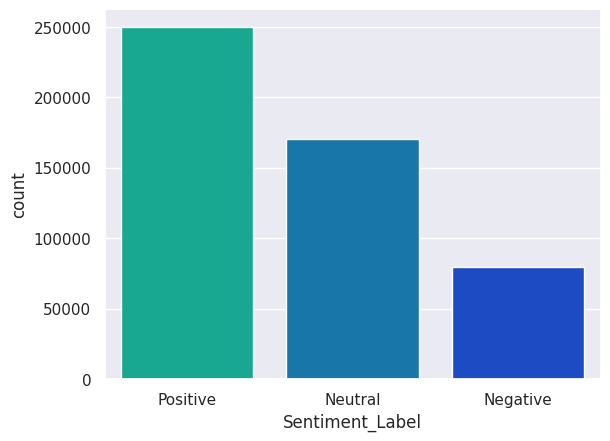

In [123]:
sns.set(style="darkgrid")
sns.countplot(x ='Sentiment_Label', data = df, palette='winter_r')
plt.show()

In [124]:
temp = df.groupby('Sentiment_Label').count()['date'].reset_index().sort_values(by='date',ascending=False)
temp.style.background_gradient(cmap='RdYlGn')

,Sentiment_Label,date
2,Positive,249948
1,Neutral,170628
0,Negative,79398


<h3><center> Funnel Chart </center></h3>

In [125]:
import plotly.offline as ofl
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment_Label,
    values = temp.date,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
ofl.iplot(fig)

<h3><center>Hist Plot</center><h3>

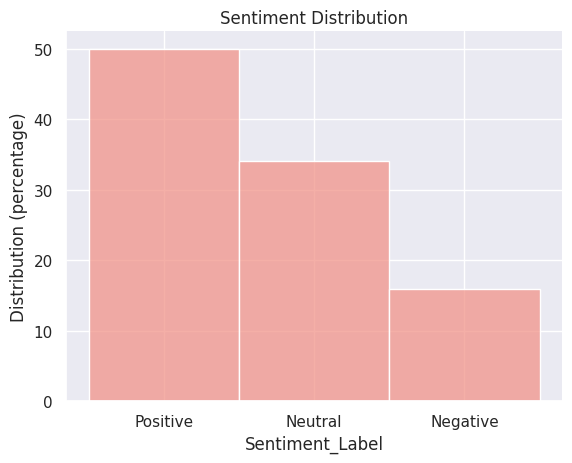

In [126]:
ax = sns.histplot(data=df, x="Sentiment_Label", stat="percent", color='#F1948A')
plt.title("Sentiment Distribution")
plt.ylabel("Distribution (percentage)")
ax.spines[['right', 'top']].set_visible(False)

<h3><center>Pie Chart</center></h3>

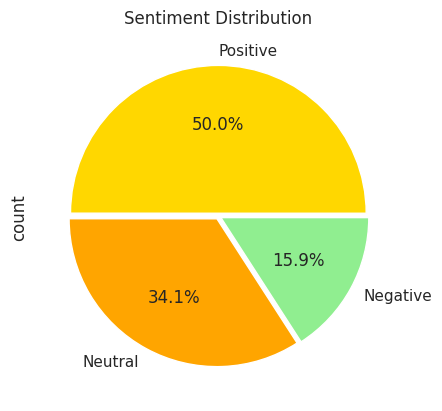

In [129]:

explode = (0.02, 0.02, 0.02)
colors = ("gold", "orange", "lightgreen") 
df.Sentiment_Label.value_counts().plot(kind='pie',colors=colors,explode=explode,autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

In [43]:
df_pos = df[df["Sentiment_Label"]=="Positive"]
df_neu = df[df["Sentiment_Label"]=="Neutral"]
df_neg = df[df["Sentiment_Label"]=="Negative"]

<h3><center>Line Chart</center></h3>

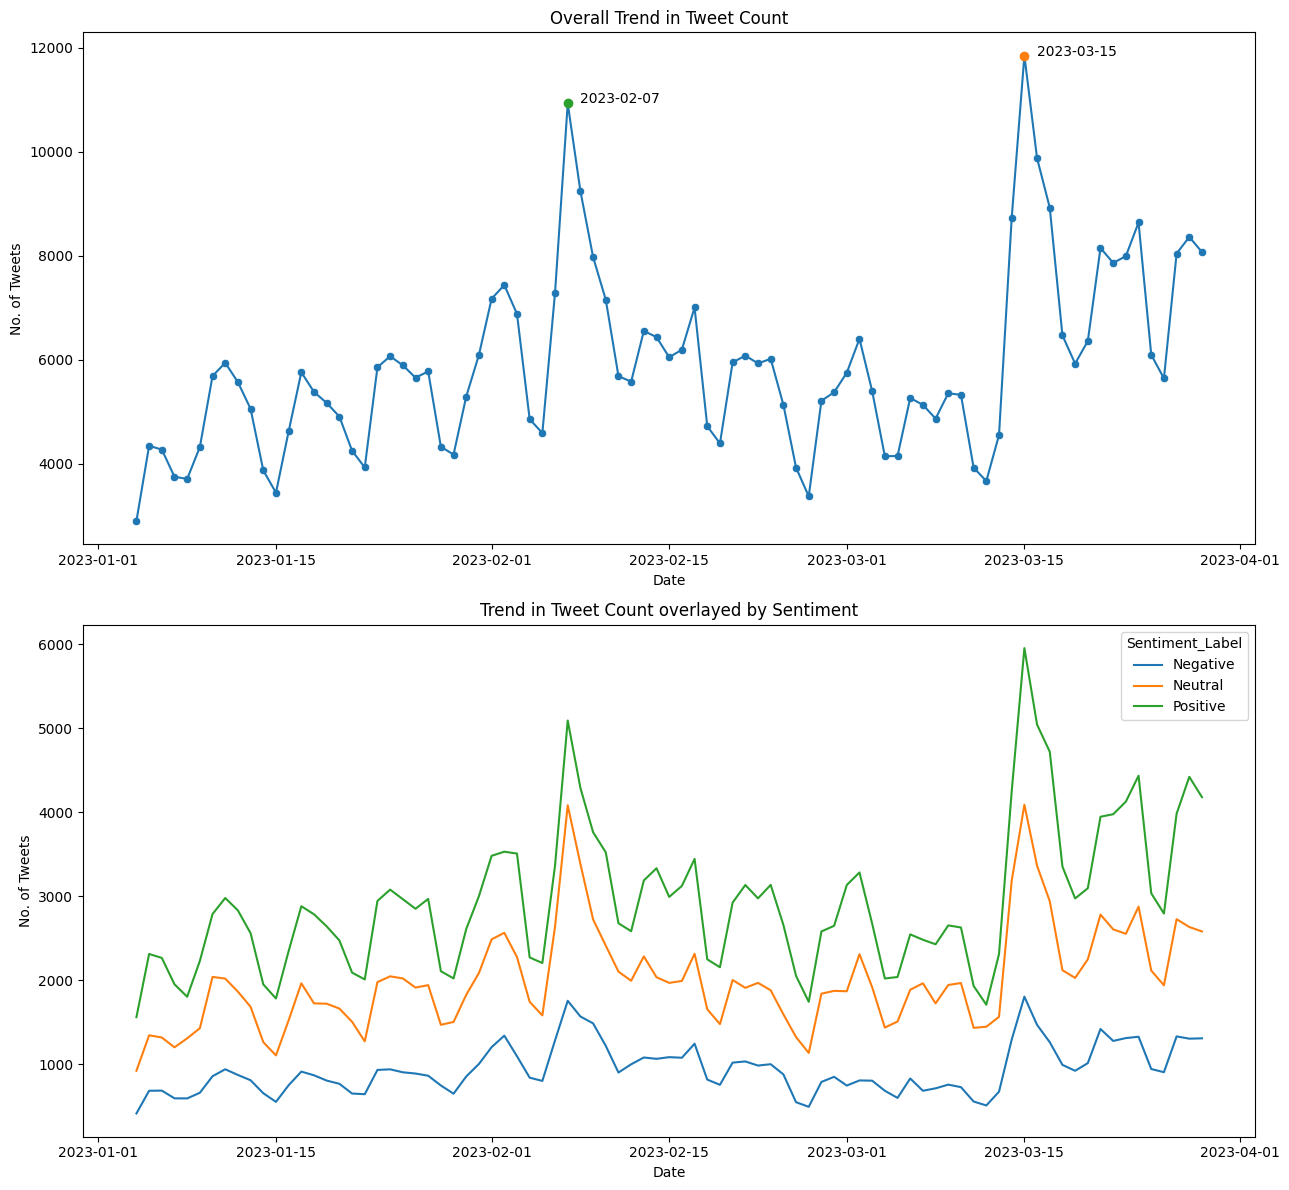

In [44]:
#Showing Line and Scatter Plots of tweet trend 
df_grouped_date_sentiment = df.groupby(by=["date only","Sentiment_Label"],as_index=False).count()
df_grouped_date = df.groupby(by=["date only"],as_index=False).count()
df_grouped_date = df_grouped_date[["date only","content_x"]]
df_grouped_date_sentiment = df_grouped_date_sentiment[["date only","Sentiment_Label","content_x"]]

max_2 = df_grouped_date.sort_values(by="content_x",ascending=False).iloc[:2]
fig = plt.subplots(2,1,figsize=(13,12))
plt.subplot(2,1,1)
sns.lineplot(data=df_grouped_date , x="date only",y="content_x",palette='Paired')
sns.scatterplot(data=df_grouped_date , x="date only",y="content_x")
plt.ylabel("No. of Tweets")
plt.xlabel("Date")
plt.title("Overall Trend in Tweet Count")

plt.text(max_2["date only"].iloc[1]+timedelta(days=1), max_2["content_x"].iloc[1], str(max_2["date only"].iloc[1]))
plt.text(max_2["date only"].iloc[0]+timedelta(days=1), max_2["content_x"].iloc[0], str(max_2["date only"].iloc[0]))
plt.plot(max_2["date only"].iloc[0], max_2["content_x"].iloc[0],marker='o')
plt.plot(max_2["date only"].iloc[1], max_2["content_x"].iloc[1],marker='o')
plt.tight_layout()
plt.subplot(2,1,2)

sns.lineplot(data=df_grouped_date_sentiment , x="date only",y="content_x", hue="Sentiment_Label", legend="full")
plt.ylabel("No. of Tweets")
plt.xlabel("Date")
plt.title("Trend in Tweet Count overlayed by Sentiment")
plt.tight_layout()

<br>
<h3><center>FINSERV ANALYSIS FOR UK ECONOMY</center></h3>

<h3> Packages to be installed </h3>

In [45]:
!pip install prince
!pip install preprocessing

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 3.4 MB/s eta 0:00:003.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 996.9/996.9 kB 3.7 MB/s eta 0:00:003.7 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 10.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.6/349.6 kB 2.6 MB/s eta 0:00:00 MB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.8 MB/s eta 0:00:00 MB/s eta 0:00:01:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 3.8 MB/s eta 0:00:000:00:01m eta 0:00:01
  Created wheel for nltk: filename=nltk-3.2.4-py3-none-any.whl size=1367704 sha256=9d4dc3d6e1c0e565

<h6> Extracting File From Zip </h6>

In [101]:
import zipfile

zip_pth = 'train_data.csv.zip'
destination_pth = 'data/'

with zipfile.ZipFile(zip_pth, 'r') as zip_ref:
    zip_ref.extractall(destination_pth)

<h6> Importing Libraries </h6>

In [22]:
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.decomposition import PCA
from nltk.stem import PorterStemmer
from sklearn.utils import shuffle
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import string
import prince
import nltk
import re
warnings.filterwarnings("ignore")

<h6> Reading data</h6> 

In [102]:
df = pd.read_csv('data/train_data.csv')

<h6>EDA</h6>

In [24]:
#First 5 rows
df.head(5)

,text,label
0,Here are Thursday's biggest analyst calls: App...,0
1,Buy Las Vegas Sands as travel to Singapore bui...,0
2,"Piper Sandler downgrades DocuSign to sell, cit...",0
3,"Analysts react to Tesla's latest earnings, bre...",0
4,Netflix and its peers are set for a ‘return to...,0


In [53]:
#Checking Null Values
df.isnull().sum()

text     0
label    0
dtype: int64

<h4>Data Visualization</h4>

<h3><center>Count Plot</center></h3>

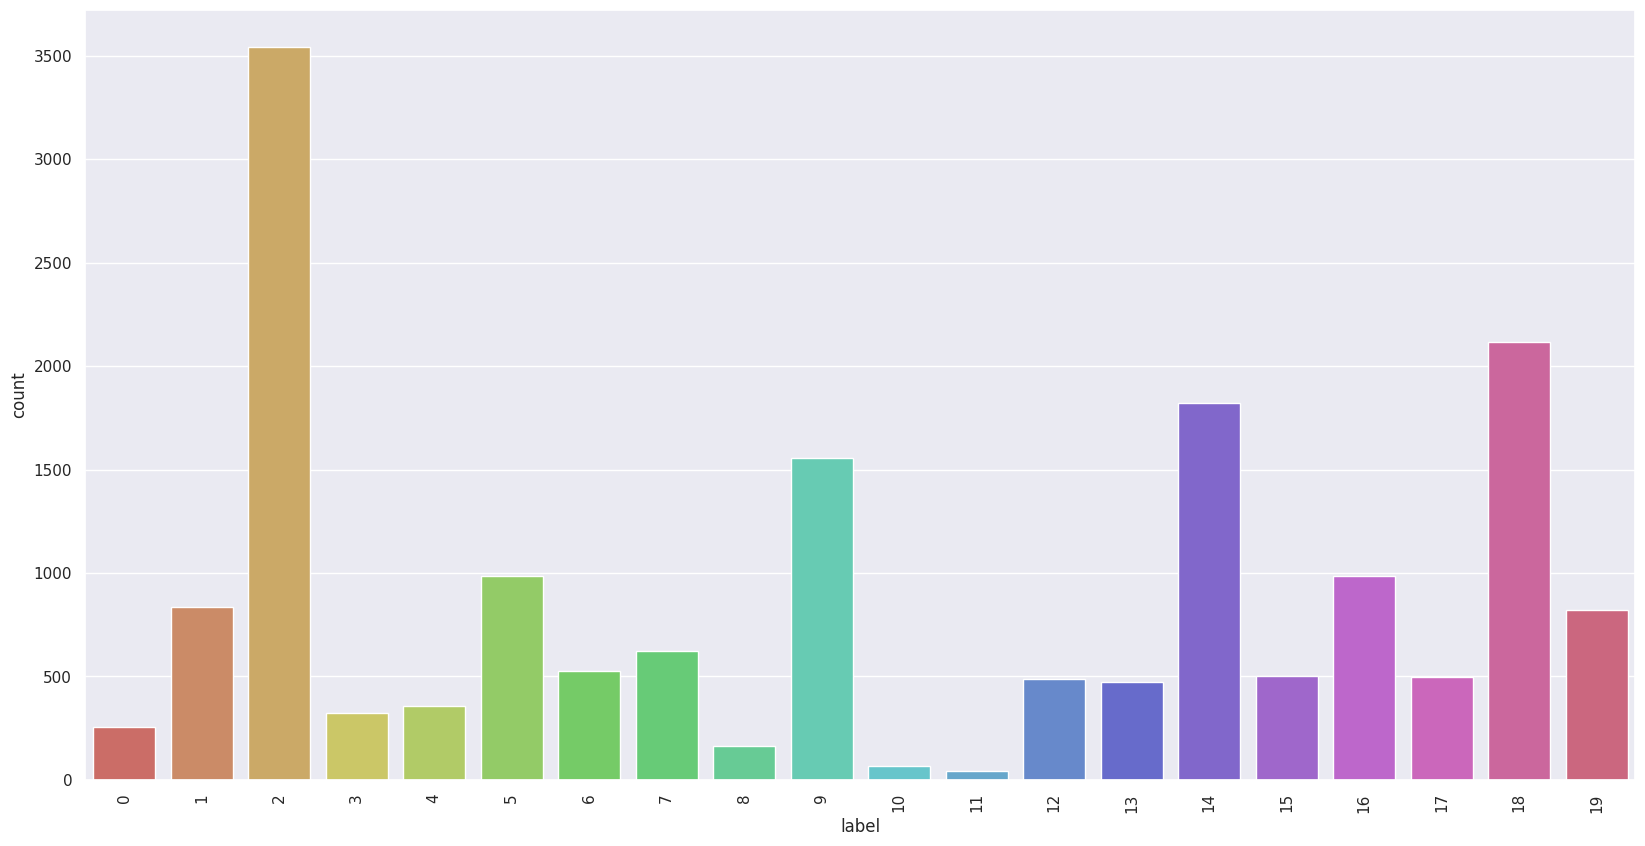

In [91]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x = df['label'], data=df, palette='hls')
plt.xticks(rotation=90)
plt.show()

In [103]:
#Random Sample
df = shuffle(df)
N = df.sample(frac=0.05, replace=False, random_state=1)#Change the rate of frac percentage
N

,text,label
16695,$BONDX: Overnight Treasury Market Summary htt...,3
9235,Musk asks court to reject Company’s request fo...,12
8279,The full normalization of diplomatic ties betw...,9
5229,$JPM $JPM.PG $JPM.PH - JPMorgan Chase &amp; Co...,5
10056,$ECONX: June Capacity Utilization 80.0% vs 80....,14
...,...,...
9312,"Digital Currency Group, the parent company of ...",12
6027,Markets are too sanguine about the Federal Res...,1
14245,"ES_F back to 3775 VPOC wall, see if can get above",18
9173,US antitrust authorities probe PGA Tour over r...,12


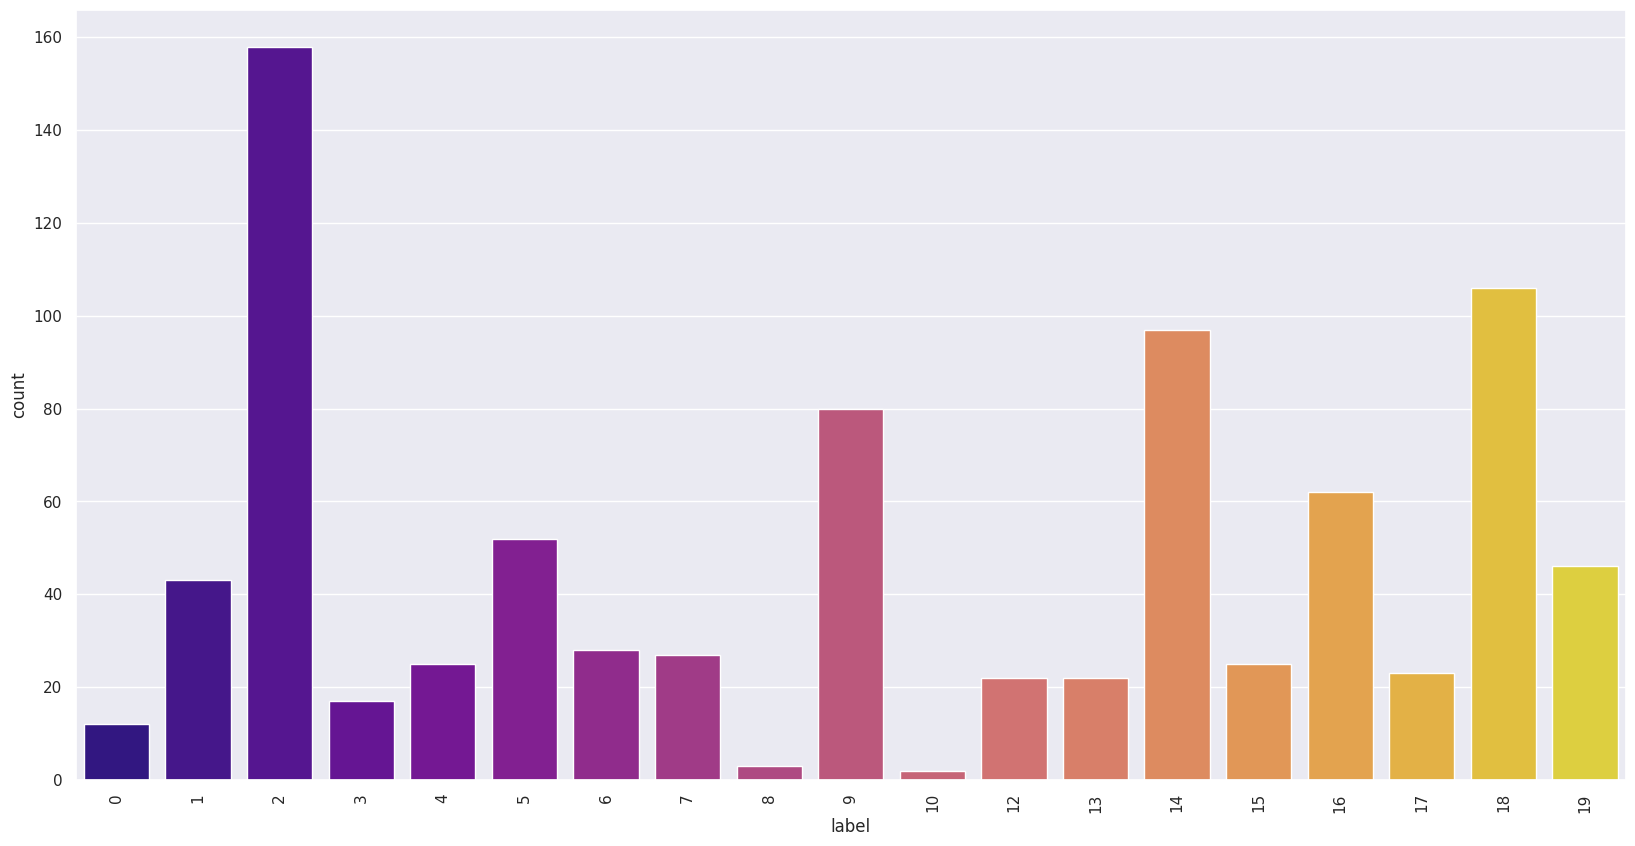

In [62]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,10))
sns.countplot(x = N['label'], data=N, palette='plasma')
plt.xticks(rotation=90)
plt.show()

In [104]:
array = N.to_numpy()#convert to numpy
# nltk.data.path.append('/home/roadcast/nltk_data')

#stop words list
stop_words = set(stopwords.words('english'))

#add other things to stop_words
stop_words.add(',')
stop_words.add('.')
stop_words.add('“')
stop_words.add('’')
stemmer= PorterStemmer()
lemmatizer=WordNetLemmatizer()
l = len(array)

for i in range(l):
    array[i][0] = array[i][0].lower() #Upper to lower
    array[i][0] = ''.join((z for z in array[i][0] if not z.isdigit())) #removing numbers
    array[i][0] = array[i][0].strip() #Removing white space
    array[i][0] = array[i][0].translate(str.maketrans('', '', string.punctuation))#remove Punctuation
    array[i][0] = re.sub('http://\S+|https://\S+', '', array[i][0])#remove http adress
    word_tokens = word_tokenize(array[i][0]) #Tokenize
    array[i][0] = word_tokens

    array[i][0] = [word for word in array[i][0] if not word in stopwords.words()]
    a = []
    le = len(array[i][0])
    c = 0
    for word in array[i][0]:
            if c<le-1:
                w1 = stemmer.stem(word)
                w2 = lemmatizer.lemmatize(word)#lemmatize
                a.append(w2)
                array[i][0] = a
                c = c + 1
print(array)

[[list(['bondx', 'overnight', 'treasury', 'market', 'summary']) 3]
 [list(['musk', 'asks', 'court', 'reject', 'company', '’', 'request', '‘', 'warp', 'speed', '’', 'trial'])
  12]
 [list(['full', 'normalization', 'diplomatic', 'tie', 'israel', 'saudi', 'arabia', 'time', 'unfold', 'series', 'smaller', 'step', 'israel', '’', 'deputy', 'foreign', 'minister', 'idan', 'roll'])
  9]
 ...
 [list(['esf', 'back', 'vpoc']) 18]
 [list(['antitrust', 'authority', 'probe', 'pga', 'tour', 'response', 'saudi', 'rival', 'liv'])
  12]
 [list(['httpstcoeccogap', 'raise', 'expedition', 'growth', 'capital', 'bring', 'power', 'content', 'management', 'httpstcoarqhxbon'])
  2]]


<h3> Word Cloud </h3>

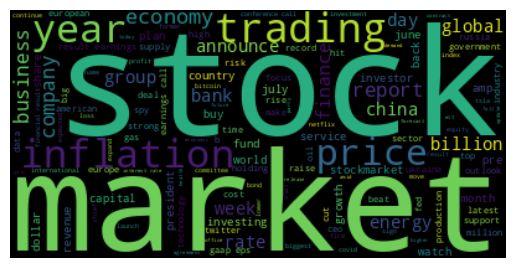

In [36]:
Total_tokens = ''
comment_words = ''
for i in range(l):
    l2 =len(array[i][0])
    for j in range(l2):
        Total_tokens = Total_tokens+' '+array[i][0][j]

wordcloud = WordCloud().generate(Total_tokens)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<h3> Sentiment Analysis </h3>

In [105]:

# Assuming 'array' contains your preprocessed text data
text_data = array[:, 0]

# Initialize the Sentiment Intensity Analyzer
sia = SentimentIntensityAnalyzer()

# Function to categorize a list of words into positive, negative, and neutral
def categorize_sentiment(word_list):
    sentence = ' '.join(word_list)
    sentiment_score = sia.polarity_scores(sentence)['compound']
    if sentiment_score >= 0.05:
        return 'positive'
    elif sentiment_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each list of words in the text data
sentiment_categories = np.vectorize(categorize_sentiment)(text_data)

<h6> Data Visualization </h6>

<h3><center>Hist Plot</center> </h3>

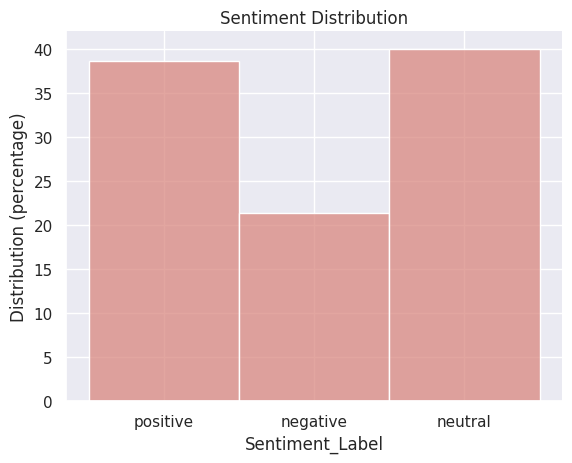

In [106]:

# Assuming sentiment_categories is the array containing sentiment labels ('positive', 'negative', 'neutral')

# Create a DataFrame with sentiment_categories
df_sentiment = pd.DataFrame({'Sentiment_Label': sentiment_categories})

# Plot the sentiment distribution
ax = sns.histplot(data=df_sentiment, x="Sentiment_Label",color='#D98880', stat="percent")
plt.title("Sentiment Distribution")
plt.ylabel("Distribution (percentage)")
ax.spines[['right', 'top']].set_visible(False)

# Show the plot
plt.show()

In [108]:
df_sentiment['index_new'] = df_sentiment.index

In [109]:
temp = df_sentiment.groupby('Sentiment_Label').count()['index_new'].reset_index().sort_values(by='index_new',ascending=False)
temp.style.background_gradient(cmap='RdYlGn')

,Sentiment_Label,index_new
1,neutral,340
2,positive,328
0,negative,182


<h3><center>Pie Chart</center> </h3>

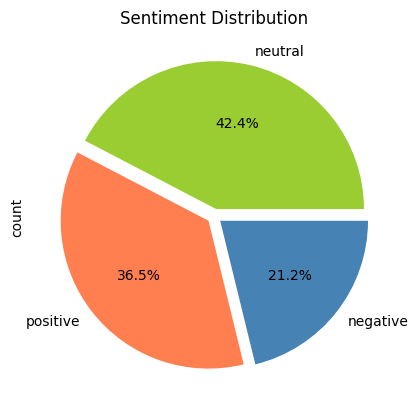

In [61]:
explode = (0.05, 0.05, 0.05)
colors = ( "yellowgreen", "coral","steelblue") 
df_sentiment.Sentiment_Label.value_counts().plot(kind='pie',colors=colors,explode=explode,autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

<h3><center> Count Plot</center></h3>

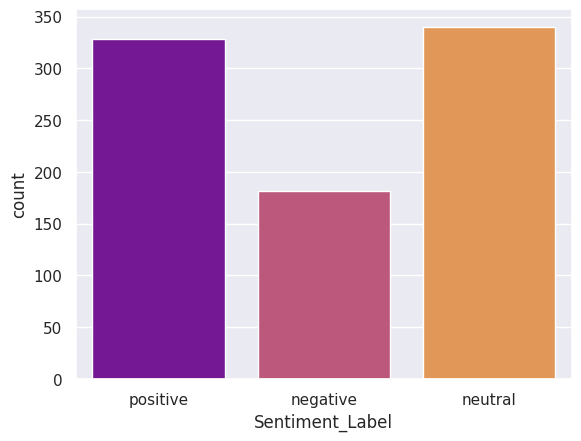

In [111]:
sns.set(style="darkgrid")
sns.countplot(x ='Sentiment_Label', data = df_sentiment, palette='plasma')
plt.show()

<br>
<h3><center>Energy Resource Impact on UK economy</center></h3>

In [70]:
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 3.5 MB/s eta 0:00:003.6 MB/s eta 0:00:01
DEPRECATION: python-debian 0.1.39ubuntu1 has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of python-debian or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


<h6> Extracting file </h6>

In [63]:
import zipfile

zip_pth = 'energy_transition_tweets_final.csv.zip'
destination_pth = 'data/'

with zipfile.ZipFile(zip_pth, 'r') as zip_ref:
    zip_ref.extractall(destination_pth)

<h6>Importing Packages</h6>

In [71]:
import pandas as pd
from sklearn.utils import shuffle
from textblob import TextBlob
import matplotlib.pyplot as plt
import plotly.offline as ofl

<h6>Reading Data </h6>

In [130]:
df = pd.read_csv('data/energy_transition_tweets_final.csv')

<h6>EDA</h6>

In [79]:
df.head()

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place
1822,https://twitter.com/kali0x2a/status/1460291229...,1460291229464383490,2021-11-15T16:58:54+00:00,"""inventing energy sources"". look, you cannot ""...",Germany,False,2,0,4,0,en,Twitter Web App,NaN,NaN
5702,https://twitter.com/nbso_nantes/status/1458078...,1458078853499392000,2021-11-09T14:27:43+00:00,𝗕𝗶𝗼𝟯𝟲𝟬 𝗯𝗲𝘂𝗿𝘀: 𝗯𝗶𝗼𝗺𝗮𝘀𝘀𝗮 𝗲𝗻 𝗯𝗶𝗼-𝗲𝗻𝗲𝗿𝗴𝗶𝗲: 𝗱𝗲 𝗴𝘂𝗻𝘀...,"Nantes, France",True,0,1,2,1,no,Twitter Web App,NaN,NaN
1871,https://twitter.com/EnterpriseAI_/status/14602...,1460276887511605253,2021-11-15T16:01:55+00:00,"IBM, Amazon Web Services Join Forces to Help O...","San Diego, CA",False,0,0,0,0,en,Hootsuite Inc.,NaN,NaN
11947,https://twitter.com/GenesisAfrica/status/14554...,1455445365910614024,2021-11-02T08:03:10+00:00,"""While the #energytransition is a global pheno...","London, United Kingdom",False,1,0,0,0,en,Twitter Web App,NaN,NaN
3253,https://twitter.com/MattUyttendaele/status/145...,1459178932771590154,2021-11-12T15:19:02+00:00,@JonXtensen @pkedrosky The Energy Transition s...,Seattle,False,0,0,2,0,en,Twitter for iPhone,NaN,NaN


In [133]:
#shuffling data to get random sample
df = shuffle(df)
N = df.sample(frac=0.05, replace=False, random_state=1)#Change the rate of frac percentage
N

,tweetURL,tweetID,date,tweetContent,userLocation,isUserVerified,replyCount,retweetCount,likeCount,quoteCount,tweetLanguage,sourceLabel,coordinates,place
14740,https://twitter.com/CarbonBubble/status/145368...,1453689253402132481,2021-10-28T11:45:00+00:00,Meet the people who abandoned their high #carb...,"London, England",True,0,0,1,0,en,Twitter Web App,NaN,NaN
2583,https://twitter.com/TPM_NEWS/status/1459847330...,1459847330535022592,2021-11-14T11:35:00+00:00,“The energy transition is becoming a guiding p...,"Mumbai, India",False,0,0,0,0,en,WordPress.com,NaN,NaN
6643,https://twitter.com/glenhartman11/status/14576...,1457675502668247044,2021-11-08T11:44:56+00:00,@SariArhoHavren China caught in LOWER middle i...,NaN,False,0,0,0,0,en,Twitter for Android,NaN,NaN
6996,https://twitter.com/LunghieDwue/status/1457440...,1457440636550983680,2021-11-07T20:11:40+00:00,@tito_mboweni Who is benefiting from the $8 bi...,"Budapest, Hungary",False,1,4,27,1,en,Twitter Web App,NaN,NaN
335,https://twitter.com/quakes99/status/1460971487...,1460971487238651910,2021-11-17T14:02:00+00:00,New @Sprott Special Report: #Uranium &amp; #Nu...,"Vancouver Island, British Columbia, Canada",False,0,9,70,0,en,Twitter Web App,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5258,https://twitter.com/Kashish_IEEFA/status/14582...,1458282189280329733,2021-11-10T03:55:42+00:00,Chinese power cuts increased India’s solar pro...,"Mumbai, India",False,0,4,7,0,en,Twitter for iPhone,NaN,NaN
14783,https://twitter.com/Ener_Community/status/1453...,1453672953992843274,2021-10-28T10:40:14+00:00,By working together we can make the #energysec...,Vienna,False,0,2,4,0,en,Twitter Web App,NaN,NaN
3739,https://twitter.com/kentoncmatt/status/1458901...,1458901291518861313,2021-11-11T20:55:47+00:00,Pitfalls Of The Green-Energy Transition On Ful...,"Salt Lake City, UT",False,1,2,3,0,en,Twitter Web App,NaN,NaN
1957,https://twitter.com/westwood_energy/status/146...,1460254051061411842,2021-11-15T14:31:10+00:00,"Arindam Das, Head of Commercial Advisory, led ...",Worldwide,False,0,1,2,0,en,Twitter Web App,NaN,NaN


In [131]:
#convert to numpy
array = N.to_numpy()

#stop words list
stop_words = set(stopwords.words('english'))

#add other things to stop_words
stop_words.add(',')
stop_words.add('.')
stop_words.add('“')
stop_words.add('’')
stemmer= PorterStemmer()
lemmatizer=WordNetLemmatizer()
l = len(array)

for i in range(l):
    array[i][0] = array[i][0].lower() #Upper to lower
    array[i][0] = ''.join((z for z in array[i][0] if not z.isdigit())) #removing numbers
    array[i][0] = array[i][0].strip() #Removing white space
    array[i][0] = array[i][0].translate(str.maketrans('', '', string.punctuation))#remove Punctuation
    array[i][0] = re.sub('http://\S+|https://\S+', '', array[i][0])#remove http adress
    word_tokens = word_tokenize(array[i][0]) #Tokenize
    array[i][0] = word_tokens

    array[i][0] = [word for word in array[i][0] if not word in stopwords.words()]
    a = []
    le = len(array[i][0])
    c = 0
    for word in array[i][0]:
            if c<le-1:
                w1 = stemmer.stem(word)
                w2 = lemmatizer.lemmatize(word)#lemmatize
                a.append(w2)
                array[i][0] = a
                c = c + 1
print(array)

[[list(['bondx', 'overnight', 'treasury', 'market', 'summary']) 3]
 [list(['musk', 'asks', 'court', 'reject', 'company', '’', 'request', '‘', 'warp', 'speed', '’', 'trial'])
  12]
 [list(['full', 'normalization', 'diplomatic', 'tie', 'israel', 'saudi', 'arabia', 'time', 'unfold', 'series', 'smaller', 'step', 'israel', '’', 'deputy', 'foreign', 'minister', 'idan', 'roll'])
  9]
 ...
 [list(['esf', 'back', 'vpoc']) 18]
 [list(['antitrust', 'authority', 'probe', 'pga', 'tour', 'response', 'saudi', 'rival', 'liv'])
  12]
 [list(['httpstcoeccogap', 'raise', 'expedition', 'growth', 'capital', 'bring', 'power', 'content', 'management', 'httpstcoarqhxbon'])
  2]]


<h3> Word Cloud </h3>

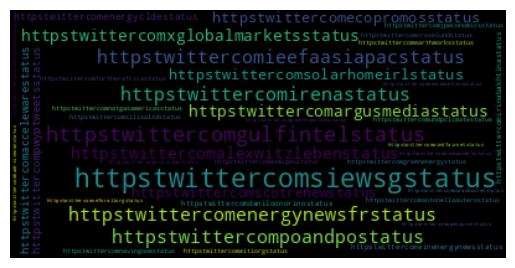

In [67]:
Total_tokens = ''
comment_words = ''
for i in range(l):
    l2 =len(array[i][0])
    for j in range(l2):
        Total_tokens = Total_tokens+' '+array[i][0][j]

wordcloud = WordCloud().generate(Total_tokens)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [134]:
# Perform sentiment analysis using TextBlob
N["Sentiment"] = N["tweetContent"].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Classify sentiments into positive, negative, or neutral
N["Sentiment_Label"] = N["Sentiment"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Plot the number of positive and negative tweets
sentiment_counts = N["Sentiment_Label"].value_counts()


<h6>Data Visualization</h6>

<h3><center>Count Plot</center> </h3>

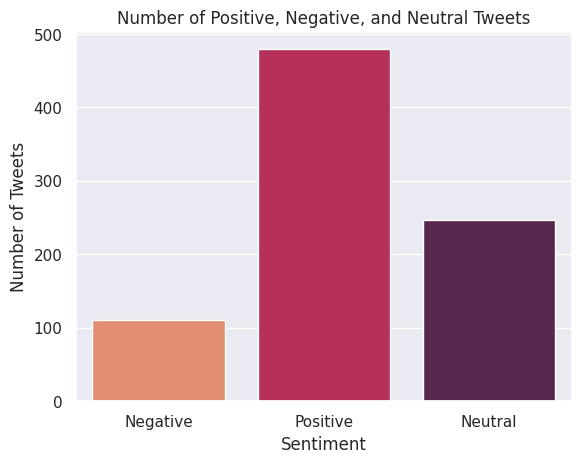

In [135]:
sns.set(style="darkgrid")
sns.countplot(x ='Sentiment_Label', data = N, palette='rocket_r')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.title('Number of Positive, Negative, and Neutral Tweets')
plt.show()

In [75]:
temp = N.groupby('Sentiment_Label').count()['date'].reset_index().sort_values(by='date',ascending=False)
temp.style.background_gradient(cmap='RdYlGn')

,Sentiment_Label,date
2,Positive,443
1,Neutral,288
0,Negative,105


<h3><center> Funnel Chart </center> </h3>

In [85]:
colors = ["gold", "gold", "lightgreen"]
fig = go.Figure(go.Funnelarea(
    text =temp.Sentiment_Label,
    values = temp.date,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"},
    marker=dict(colors=colors, pattern=dict(shape=["", "/", "", ""]))
    
    ))
ofl.iplot(fig)

<h3><center>Pie Chart of Sentiment Distribution</center></h3>

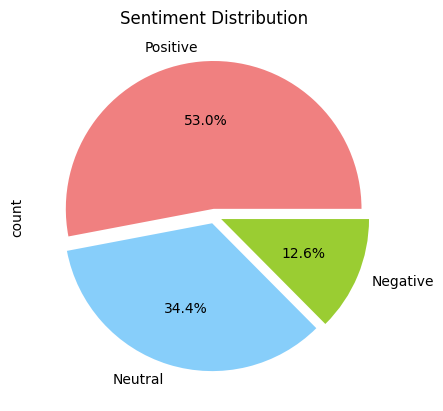

In [77]:
explode = (0.05, 0.05, 0.05)
colors = ( "lightcoral", 
          "lightskyblue", "yellowgreen") 
N.Sentiment_Label.value_counts().plot(kind='pie',colors=colors,explode=explode,autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()